### sklearn 라이브러리를 활용한 mnist 손글씨 70,000개 분류하기

#### 1. sklearn에서 제공하는 mnist dataset load

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist.data.shape, mnist.target.shape
# (70000, 784)

((70000, 784), (70000,))

#### 2. pickle로 저장하고 불러오기

In [2]:
import pickle

In [3]:
with open('mnist.txt', 'wb') as f:
     pickle.dump(mnist, f)

In [4]:
with open('mnist.txt', 'rb') as f:
     mnist = pickle.load(f)

#### 3. 데이타 상태 확인하기

In [5]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [8]:
mnist.target_names

['class']

In [6]:
mnist.data[0] # black = 0 and white = 255

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [7]:
mnist.target[0]

'5'

#### 5. Dataset을 train data와 test data로 split하기

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(mnist.data,mnist.target,test_size=0.1)

In [9]:
import pandas as pd
ydf = pd.DataFrame( y_train,columns=['c'])

In [10]:
ydf['c'].value_counts()

1    7100
7    6519
3    6413
2    6310
6    6262
9    6223
8    6168
4    6156
0    6148
5    5701
Name: c, dtype: int64

#### 6. RandomForestClassifier를 활용 학습,예측하기

In [11]:
from sklearn.ensemble import RandomForestClassifier

# module loading
clf = RandomForestClassifier()

# train data!
clf.fit(X_train, y_train)

# make predicition
prediction = clf.predict(X_test)
print(prediction.shape)
# 7000

(7000,)


In [12]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction))

0.9721428571428572


#### 7. Visualization

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 랜덤하게 몇 가지 data 가져오기
n_test = len(X_test)
random_pick = np.random.randint(low=0, high=n_test, size=10)
print(random_pick)
# array([3898, 6815, 6640, 2924,  451, 2688,  633, 6563, 5993, 4024])

[5133 3121 5350 3426 5284 3228 5388 2491 1452 1183]


['1' '5' '1' '8' '4' '8' '1' '4' '4' '1']


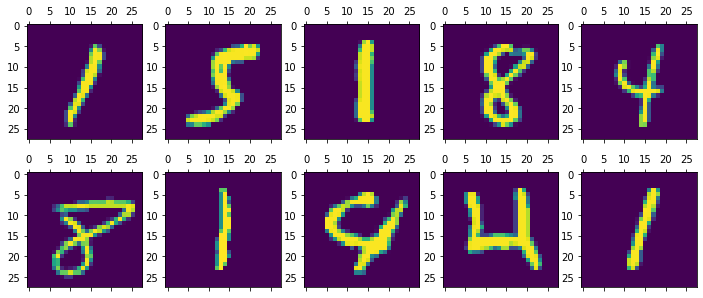

In [14]:
figure = plt.figure()
figure.set_size_inches(12, 5)

axes = []
for i in range(1, 11):
    axes.append(figure.add_subplot(2, 5, i))

tmp_list = []
for i in range(10):
    tmp = X_test[random_pick[i]]
    tmp = tmp.reshape(-1, 28)
    tmp_list.append(tmp)
    
print(y_test[random_pick])

for i in range(10):
    axes[i].matshow(tmp_list[i])

#### 8. 이미지로 예측하기

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  183  32  32 159 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255  24   0   0   8 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255   0   0   0 104 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 183   0   0   0 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255  24   0   0   0 255 255 

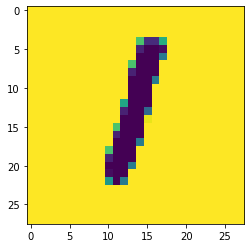

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 183  32   0   0   0   0   0  32 159 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 159  16   0   0   0   0
    0   0   0   8 159 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 151   0   0   0   0   0   0   0   0   0   0   8 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255  24   0   0   0 104
  255 255 255 135   0   0   0 159 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255   0   0   0 151 255 255 255 255 255   8   0   0   8
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255   8   0   0
    8 255 255 255 255 255 135   0   0 

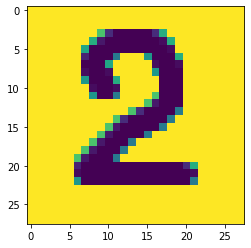

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from PIL import Image
%matplotlib inline

for image_path in glob.glob("./mydata/*.png"):
    img = Image.open(image_path).convert("L")
    plt.imshow(img)
    img = np.resize(img, (1,784))
    print(img)
    img = 255-(img)
    print(img)
    prediction = clf.predict(img)
    print(prediction)
    plt.show()
